In [1]:
import tensorflow as tf

from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt


In [2]:
IMG_SIZE = 256
BATCH_SZ = 32
CHANNELS = 3

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Plant_data",
    shuffle = True,
    image_size =(IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SZ
       
)

    

Found 2152 files belonging to 3 classes.


In [3]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
len(dataset)

68

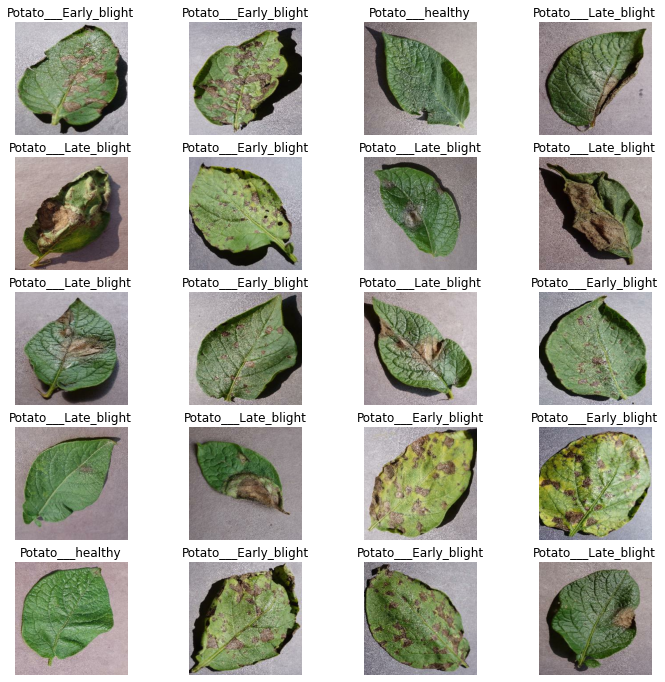

In [5]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in dataset.take(1):
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i].numpy()])
        plt.axis("off")
 

In [6]:
train_size = 0.8
len(dataset)*train_size


54.400000000000006

In [7]:
train_ds = dataset.take(54)
len(train_ds)

54

In [8]:
test_ds = dataset.skip(54)

In [9]:
len(test_ds)

14

In [10]:
val_ds = test_ds.take(7)

In [11]:
test_ds1 =test_ds.skip(7)

In [12]:
len(test_ds1)

7

In [13]:
len(val_ds)

7

In [14]:
def get_dataset_partition_tf(ds, train_split=0.8 , val_split= 0.1, test_split=0.1 , shuffle=True , shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed= 15)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds


In [15]:
train_ds, val_ds,  test_ds  = get_dataset_partition_tf(dataset)
len( train_ds)


54

In [16]:
len(test_ds)

8

In [17]:
len(val_ds)

6

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE,IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [21]:
input_shape = (BATCH_SZ,IMG_SIZE,IMG_SIZE,CHANNELS)
n_classes= 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation= 'relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3),activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3),activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3),activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3),activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3),activation= 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(n_classes, activation='softmax'),
    
    
])

model.build(input_shape = input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer ='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']

)

In [24]:
EPOCHS = 25
history = model.fit(
    train_ds ,
    epochs = EPOCHS ,
    batch_size = BATCH_SZ,
    validation_data = val_ds,

)

Epoch 1/25
54/54 [==============================] - 253s 5s/step - loss: 0.8929 - accuracy: 0.4695 - val_loss: 0.9130 - val_accuracy: 0.6667
Epoch 2/25
54/54 [==============================] - 206s 4s/step - loss: 0.7664 - accuracy: 0.6719 - val_loss: 0.5963 - val_accuracy: 0.7500
Epoch 3/25
54/54 [==============================] - 185s 3s/step - loss: 0.4391 - accuracy: 0.7964 - val_loss: 0.2897 - val_accuracy: 0.8698
Epoch 4/25
54/54 [==============================] - 197s 4s/step - loss: 0.2991 - accuracy: 0.8791 - val_loss: 0.2346 - val_accuracy: 0.8854
Epoch 5/25
54/54 [==============================] - 187s 3s/step - loss: 0.2314 - accuracy: 0.9102 - val_loss: 0.6756 - val_accuracy: 0.7969
Epoch 6/25
54/54 [==============================] - 192s 4s/step - loss: 0.2446 - accuracy: 0.8967 - val_loss: 0.1549 - val_accuracy: 0.9375
Epoch 7/25
54/54 [==============================] - 197s 4s/step - loss: 0.1878 - accuracy: 0.9325 - val_loss: 0.1591 - val_accuracy: 0.9427
Epoch 8/25
54

In [25]:
score = model.evaluate(test_ds)

8/8 [==============================] - 11s 904ms/step - loss: 0.0633 - accuracy: 0.9727


In [26]:
history

In [27]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 54}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
history.history['val_accuracy']

[0.6666666865348816,
 0.75,
 0.8697916865348816,
 0.8854166865348816,
 0.796875,
 0.9375,
 0.9427083134651184,
 0.9375,
 0.9427083134651184,
 0.953125,
 0.9583333134651184,
 0.90625,
 0.9322916865348816,
 0.9427083134651184,
 0.9270833134651184,
 0.984375,
 0.921875,
 0.9791666865348816,
 0.9322916865348816,
 0.9583333134651184,
 0.9791666865348816,
 0.9479166865348816,
 0.953125,
 0.9739583134651184,
 0.9791666865348816]

Text(0.5, 1.0, 'Training And Validatioin Loss Graph')

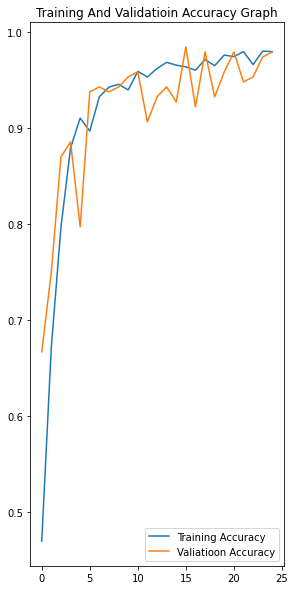

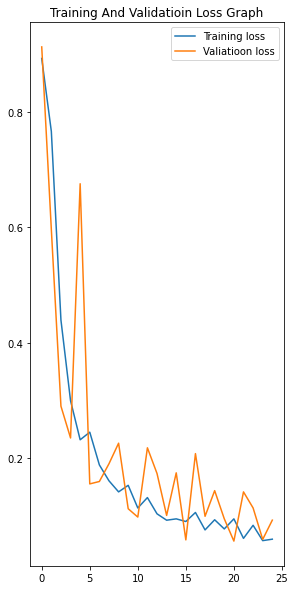

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label= 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label= 'Valiatioon Accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validatioin Accuracy Graph')

plt.figure(figsize = (10,10))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label= 'Training loss')
plt.plot(range(EPOCHS), val_loss, label= 'Valiatioon loss')
plt.legend(loc='upper right')
plt.title('Training And Validatioin Loss Graph')


first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


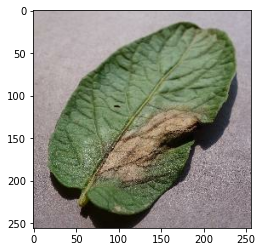

In [31]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[4])])


In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

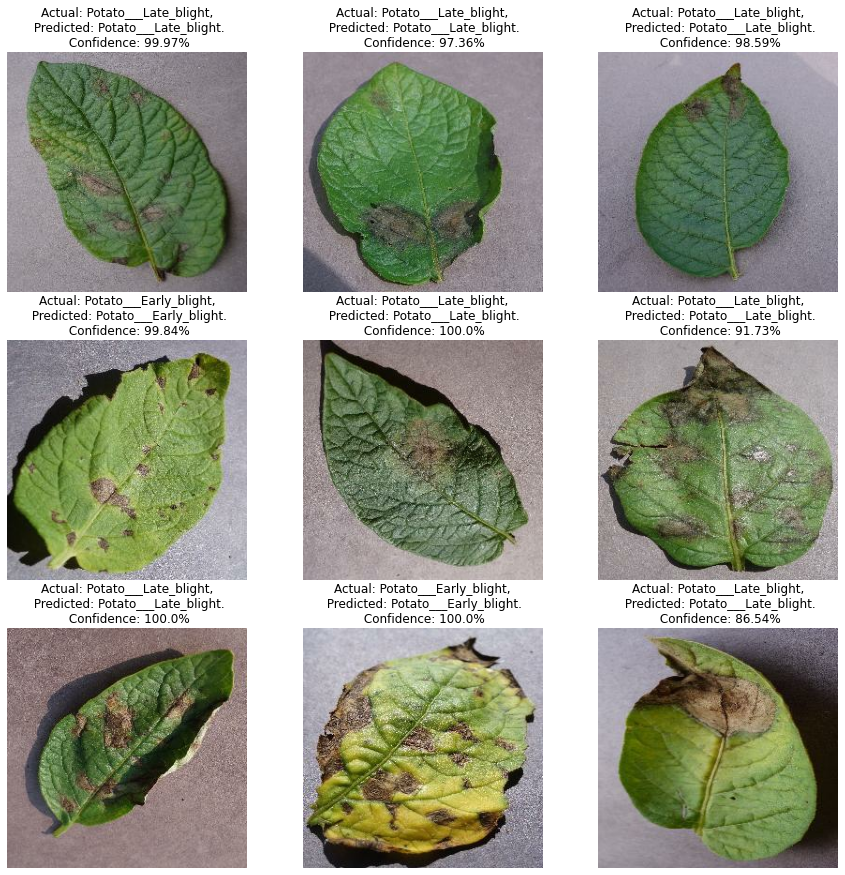

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    

In [34]:
model.save("../Models/potatoes.h5")